In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import openml

/home/darija/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def read_data():
    dataset = openml.datasets.get_dataset(dataset_id=1104,download_data=False )
    data = dataset.get_data(dataset_format='dataframe', target=dataset.default_target_attribute)
    X, y = data[0], data[1]
    y = y.map({'ALL':0,'AML':1})
    return X,pd.DataFrame(y)

In [5]:
X,y = read_data()

In [6]:
y.value_counts()

CLASS
0        47
1        25
Name: count, dtype: int64

In [7]:
#X.describe()

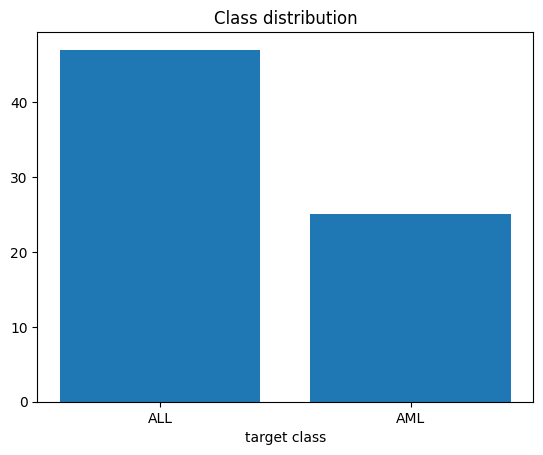

In [8]:
counts = y.value_counts()
plt.bar(['ALL','AML'],counts)
plt.title('Class distribution')
plt.xlabel("target class")
plt.show()

In [9]:
X = X.dropna()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = 0.2,stratify = y_train)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_validation = pd.DataFrame(X_validation,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [15]:
X_train.to_csv("data/X_train.csv", index=False)
X_validation.to_csv("data/X_validation.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)

y_train.to_csv("data/y_train.csv", index=False)
y_validation.to_csv("data/y_validation.csv",index = False)
y_test.to_csv("data/y_test.csv", index=False)